#開始

In [1]:
import csv
import pandas as pd
import os
import glob
encoding = 'SHIFT_JIS'
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
#files = glob.glob('/content/*.csv')
files = os.listdir('/content')
for file in files:
  print(file)

.config
062701.csv
sample_data


### グラフ表示

In [39]:
file_name = "062702.csv" # @param {type:"string"}
df = pd.read_csv("/content/"+file_name, encoding=encoding, skiprows=15)#
df = df.drop(df.columns[[0, 0]], axis=1)
t = 0.5152 # @param {type:"number"}#
df = df - t#0.41520.7263
df[(df<=0)] = 0
m = df.median().median()#df[(df>=m-w)&(df<=m+w)] = m
#df.to_csv(file_name+'(z).csv', index=False)
#df = df - m

062702.csv.png
0.8910478834142956 0.9411866759195003 0.10570999999999997


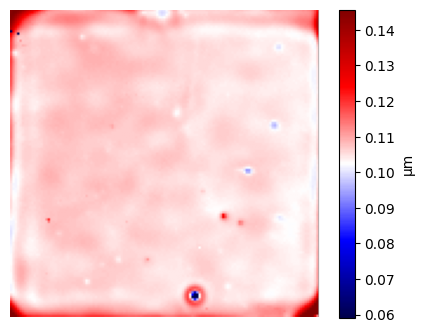

In [40]:
#x = 0.05 # @param {type:"number"}
wl =0.003
w = 0.005
x = 0.040
#df[(df<=-x)] = -x##df = df.iloc[3:-2, 4:-4]df[0,0] = -x#df=df.iloc[5:-5,5:-5]#df[(df>=m-w)&(df<=m+w)]=m
#df[(df>=m+x)] = m+x#df[(df<=m-x)] = m-x#df.iloc[0, 0] = m+x#df.iloc[0, 1] = m-x
pl=df[(df>=m-wl)&(df<=m+wl)].count().sum() /df.size
p = df[(df>=m-w)&(df<=m+w)].count().sum() /df.size
color = "seismic" # @param {type:"string"}
#l = 36 # @param {type:"number"}
cmap = plt.get_cmap(color)
plt.figure(figsize=(5, 4))
plt.imshow(df.values,cmap=cmap,aspect=1, vmin=m+x, vmax=m-x)
#plt.suptitle(file_name, fontsize=16)
#plt.contourf(df.values,cmap=cmap,levels=l)
plt.colorbar(label='µm')#plt.axis('scaled')label='µm'
plt.axis("off")
plt.xticks(np.arange(0, df.shape[1], 5))
plt.yticks(np.arange(0, df.shape[0], 5))
print(file_name+".png")
print(pl,p,m)#print(df.shape)
plt.show()

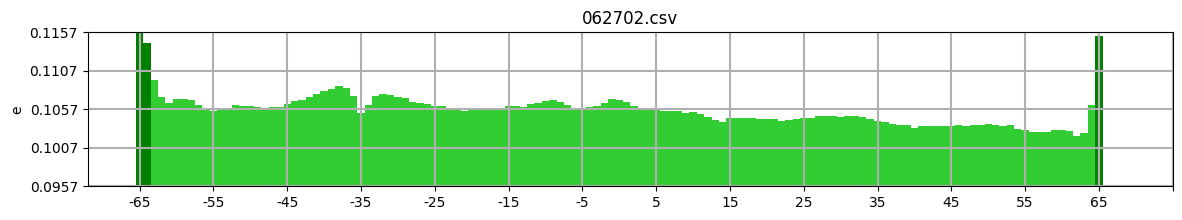

In [49]:
x = 0.01
wl=0.004
first_row = df.iloc[12]
plt.figure(figsize=(14,2))  # Adjust figure size as needed
colors = ['green' if value > m+wl else 'lime' if value < m - wl else 'limegreen' for value in  first_row.values]

plt.bar(first_row.index, first_row.values, width=1, color=colors)
plt.ylim(m-x, m+x)
plt.yticks(np.arange(m - x, m + x + 0.005, 0.005))
plt.xticks(np.arange(0, 150, 10))
plt.grid(axis='x')
plt.grid(axis='y')
plt.grid(linewidth=1.5)

#plt.xlabel("Column Index")
plt.ylabel("e")
plt.title(file_name)
plt.show()

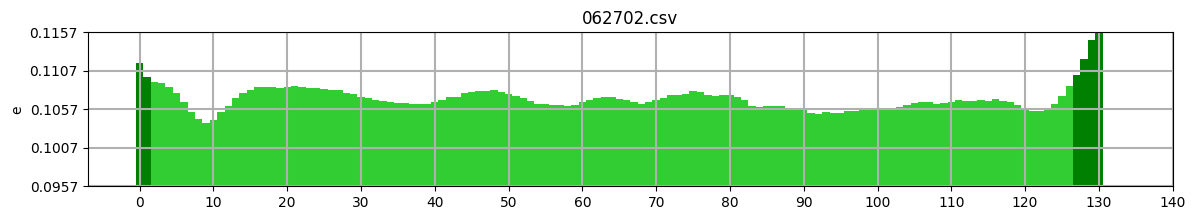

In [44]:
x = 0.01
wl=0.004
first_column = df.iloc[:,40]
plt.figure(figsize=(14,2))  # Adjust figure size as needed
colors = ['green' if value > m+wl else 'lime' if value < m - wl else 'limegreen' for value in  first_column.values]

plt.bar(first_column.index, first_column.values, width=1, color=colors)
plt.ylim(m-x, m+x)
plt.yticks(np.arange(m - x, m + x + 0.005, 0.005))
plt.xticks(np.arange(0, 150, 10))
plt.grid(axis='x')
plt.grid(axis='y')
plt.grid(linewidth=1.5)
#plt.xlabel("Column Index")
plt.ylabel("e")
plt.title(file_name)
plt.show()

### 収率計算

In [ ]:
#m = df.iloc[6:-6,6:-6].median().median()
#p = df.iloc[6:-6,6:-6][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[6:-6,6:-6].size
#p = df.iloc[6:-6,9:-9][(df>=-w)&(df<=w)].count().sum() /df.iloc[6:-6,9:-9].size
p = df[(df>=m-w)&(df<=m+w)].count().sum() /df.size
print(m,p)

0.8892746913580247


In [ ]:
print(df.shape)

(36, 142)


In [ ]:
df.to_csv(file_name+'(z).csv', index=False)


### memo

In [ ]:
dfa = pd.DataFrame(index=np.arange(46), columns=np.arange(5))
for i in range(46):
    for j in range(5):
        max=df.iloc[i:i+1, j*20:j*20+19].max().max()
        min=df.iloc[i:i+1, j*20:j*20+19].min().min()
 #       men=df.iloc[i:i+1, j*30:j*30+29].mean().mean()
        dfa.iloc[i, j] = (max-min)

In [ ]:
dfa = pd.DataFrame(index=np.arange(10), columns=np.arange(10))
for i in range(10):
    for j in range(10):
        dfa.iloc[i, j] = df.iloc[i*3+2:i*3+4, j*500:j*500+499][(df > 0)].median().median()

In [ ]:
dfa = pd.DataFrame(index=np.arange(15), columns=np.arange(15))
for i in range(15):
    for j in range(15):
        dfa.iloc[i, j] = df.iloc[i*2:i*2+1, j*333:j*333+444][(df > 0.05)].median().median()

In [ ]:
dfa = dfa.fillna(0).replace([np.inf, -np.inf], 0)
dfa = dfa.apply(pd.to_numeric, errors='coerce').fillna(0)

plt.imshow(dfa.values)
plt.colorbar(label='µm')#plt.axis('scaled')

plt.show()

In [ ]:
plt.hist(dfa.values.flatten(), bins=50,range=(0.002,0.01))
plt.show()
print(dfa.median().median())

## 収率

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

X = df.index.values
Y = df.columns.values
Z = df.values

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.contour3D(Y, X, Z, 100, cmap='seismic')
ax.set_ylim(X.min(),X.max())
ax.set_xlim(0,120)
plt.show()

差分

In [ ]:
file_name = "240930-2.csv" # @param {type:"string"}
df = pd.read_csv("/content/"+file_name, encoding=encoding, skiprows=15)#
df = df.drop(df.columns[[0, -1]], axis=1)

file_name = "240930-2-dev.csv" # @param {type:"string"}
t = 0.733 # @param {type:"number"}
x = 0.05 # @param {type:"number"}
dfb=df
df = pd.read_csv("/content/"+file_name, encoding=encoding, skiprows=15)#
df = df.drop(df.columns[[0, -1]], axis=1)
df=dfb-df+t
df[(df>x)] = x
df[(df<0)] = 0

In [ ]:
df = df.iloc[8:75, 10:110]
#df = df.iloc[:, :-11]
#pall = df[(df>=m-w)&(df<=m+w)].count().sum()   /df.size#pinn = df.iloc[9:120,9:120][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[9:120, 9:120].size#pinn = df.iloc[4:60,9:120][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[4:60,9:120].size
##
pall = df.iloc[4:126,9:120][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[4:126,9:120].size
#pall = df.iloc[2:63,9:120][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[2:63,9:120].size
##
pinn = df.iloc[9:120,20:105][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[9:120,20:105].size
#pinn = df.iloc[4:60,19:110][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[4:60,19:110].size
##pall =round(pall*100,1)pinn =round(pinn*100,1)
#df.iloc[2:63,9:120]=m-x
#df.iloc[4:60,19:110]=m+x
###
##pall = df.iloc[4:126,9:120][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[4:126,9:120].size
#pinn = df.iloc[9:120,20:105][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[9:120,20:105].size
##pall =round(pall*100,1)
##pinn =round(pinn*100,1)
#plt.title(str(pall)+" %", loc='right', color='darkgreen')
#plt.title(str(pinn)+" %", loc='center', color='black')

In [ ]:
fig, ax = plt.subplots()
cmap = plt.get_cmap('bwr')
norm = mcolors.Normalize(vmin=m-x, vmax=m+x)#(vmin=df.min().min(), vmax=df.max().max())

im = ax.imshow(df, cmap=cmap, norm=norm)
ax.set_title(str(pall)+" %", loc='right', color='darkgreen')
ax.set_title(str(pinn)+" %", loc='center', color='black')
print(file_name+".png")
plt.show()

In [ ]:
df[(df>=m-w)&(df<=m+w)] = m
#df.iloc[23:41, 41:59] = m
norm = mcolors.Normalize(vmin=m-x, vmax=m+x)#(vmin=df.min().min(), vmax=df.max().max())
cmap = plt.get_cmap('bwr')
fig, ax = plt.subplots()
im = ax.imshow(df, cmap=cmap, norm=norm)

ax.set_xticks(np.arange(0, 131, step=10))
ax.set_yticks(np.arange(0, 131, step=10))
ax.set_title(str(round(m*1000,1))+"µ", loc='left') #makuatsu
ax.set_title(str(pall)+"% 130□", loc='right')
ax.set_title(str(pinn)+"% 110□", loc='center')
#ax.grid()
#ax.set_ylim(10, 140)#ax.set_xlim(-65,65)
print(file_name+".png")
#fig.colorbar(im)
plt.show()#

等高線

In [ ]:
fig, ax = plt.subplots()

norm = mcolors.Normalize(vmin=m-x, vmax=m+x)
cmap = plt.get_cmap('bwr')
im = ax.imshow(df, cmap=cmap, norm=norm)
#plt.figure(figsize=(5, 4))
#ax.set_xticks(np.arange(0, 131, step=10))
#ax.set_yticks(np.arange(0, 131, step=10))
for i in range(0, 14, 13):
    plt.plot([(130-114)/2+i*114/13, (130-114)/2+i*114/13], [(130-122)/2, (130+122)/2],linestyle = "--", color='darkgreen', linewidth=2)
for j in range(0, 21, 20):
    plt.plot([(130-114)/2, (130+114)/2],[(130-122)/2+j*122/20, (130-122)/2+j*122/20],linestyle = "--", color='darkgreen', linewidth=2)
for i in range(1, 12, 10):
    plt.plot([(130-114)/2+i*114/13, (130-114)/2+i*114/13], [(130-110)/2, (130+110)/2],linestyle = "--", color='black', linewidth=2)
for j in range(1, 20, 18):
    plt.plot([(130-95)/2, 104],[(130-122)/2+j*122/20, (130-122)/2+j*122/20],linestyle = "--", color='black', linewidth=2)

plt.show()